In [1]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
from collections import Counter
import os
import re
import statsmodels.formula.api as sm

In [2]:
os.chdir( '/Users/Sara/Desktop/PythonProj/Google_py' )    #.... changing directory


In [3]:
df = pd.read_excel('RawData/Google.xlsx')     #... reading file


In [4]:
df_0 = df.drop_duplicates( 'Page' )   #.... dropping duplicate entries with respect to Page

df_1 = df_0[ df_0.Page != '' ]    #.... data frame after removing empty Page indices

master = df_1[ df_1.Page.notnull() ]     #..... taking only those rows where Page is not NULL

master = master.rename( columns = { 'Publisher Impressions': 'Impressions', 'Publisher Viewable Impressions %': 'ViewableImpressionsPerc',
                         
                          'Publisher CTR': 'CTR', 'Publisher Revenue / 1000 Sessions': 'Revenue' } )    #.... renaming some columns


In [5]:
cormatrix = master[ master.columns.difference( ['Page'] ) ].corr()    #.... correlation matrix


In [6]:
#.... Making links shorter ....

i = 1 ; page_formatted = []

for i in range( len( master ) ):
    page_formatted.append( master.Page[i].replace( 'www.univision.com/' , '' ) )    #.... replacing www.univision.com/'   with ''

master.Page = [ 'home' if x in [ '', 'index.php' ] else x for x in page_formatted ]     #.... replacing page variable containing '' and index.php with home

varnames = master.columns.values

my_colors = 'rgbkymc'      #.... red, green, blue, black, etc.


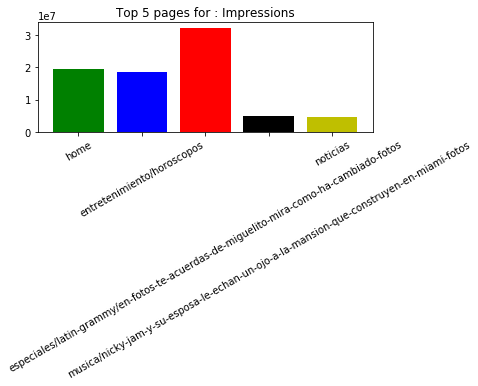

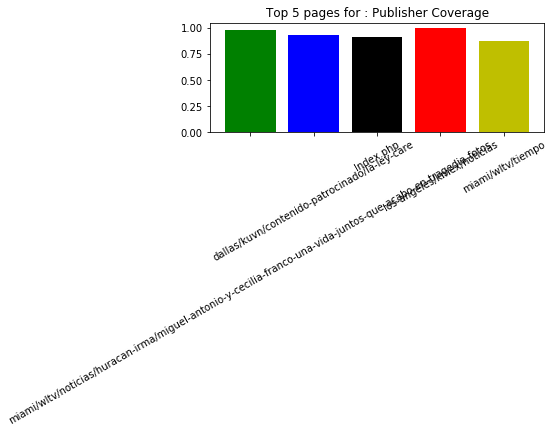

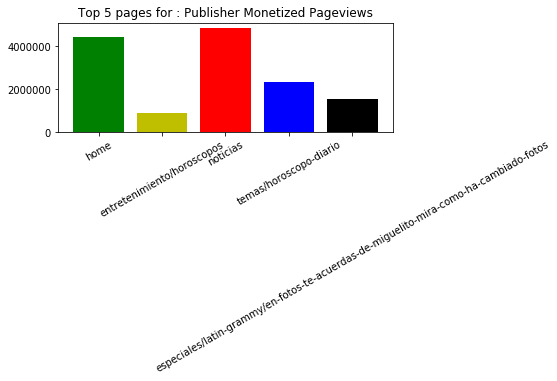

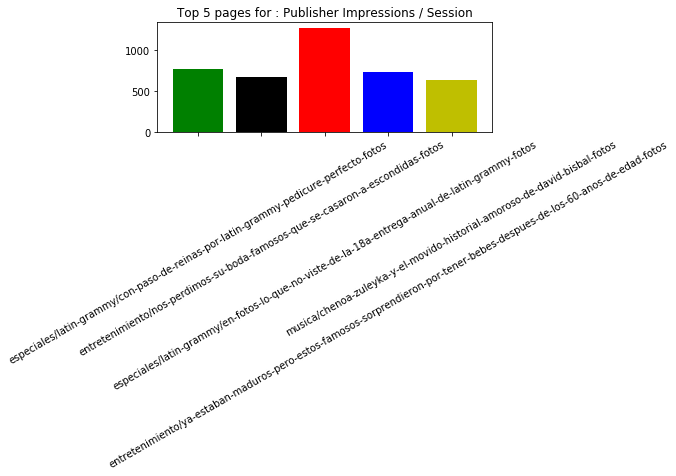

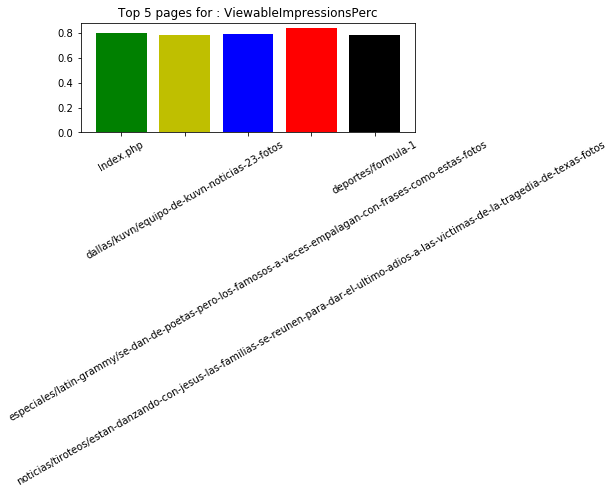

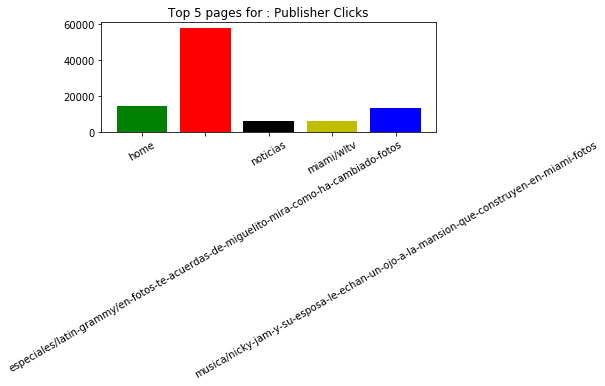

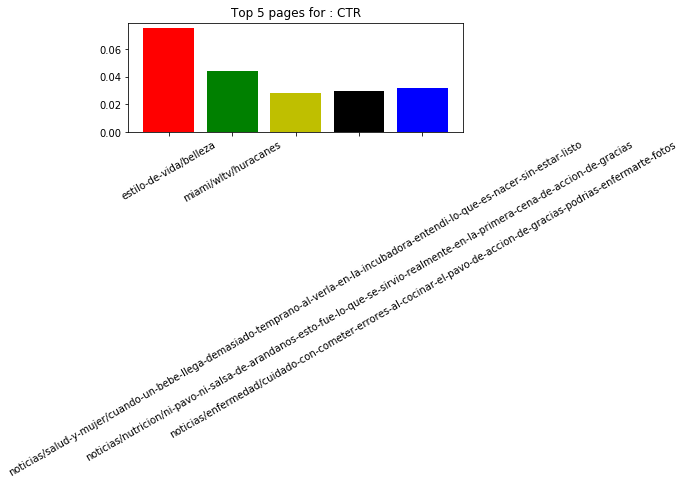

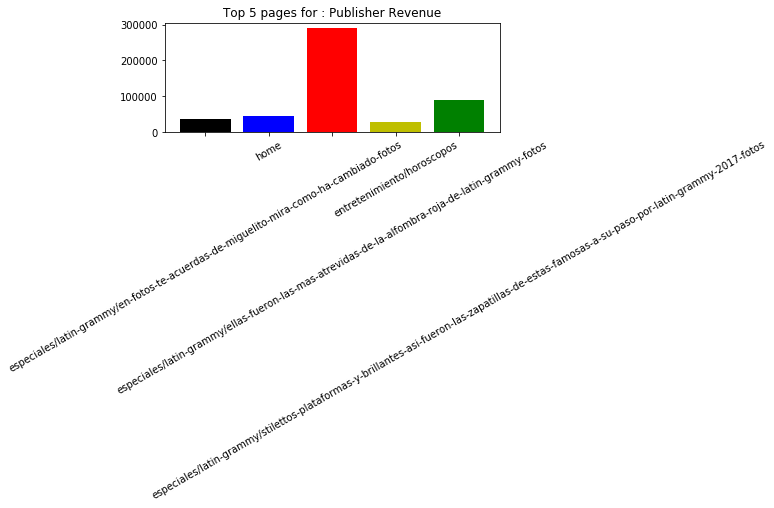

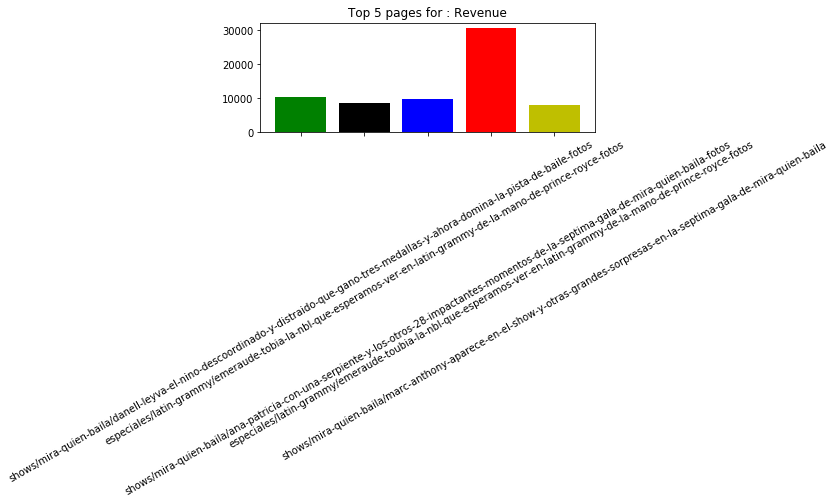

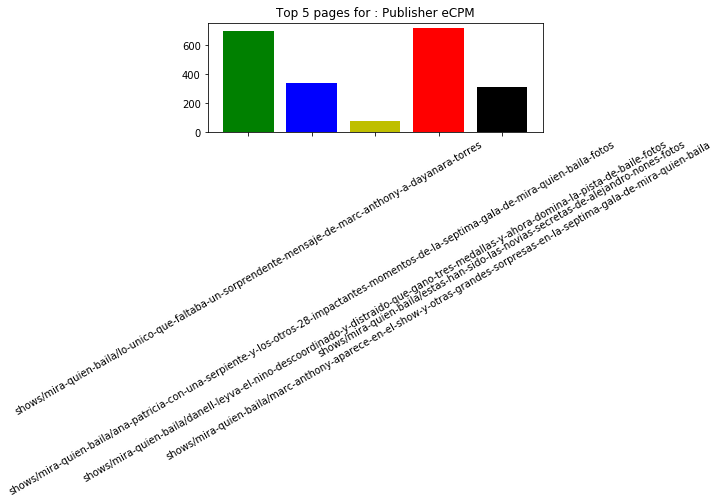

In [7]:
#.... Plot for top 5 pages .....

for j in range( len( varnames ) - 1 ):
    top_5_pages_df = master.sort_values( varnames[ j + 1 ], ascending = False ).head()   #.... sorting and taking top 5 pages
    plt.bar( top_5_pages_df.Page, top_5_pages_df.iloc[ :, j+1], color = my_colors )
    plt.xticks([])
    plt.title( 'Top 5 pages for : ' + varnames[ j + 1 ] )
    plt.xticks( range( 5 ), top_5_pages_df.Page.tolist(), rotation = 30 )
    plt.subplots_adjust(bottom=0.5) 
    plt.show()



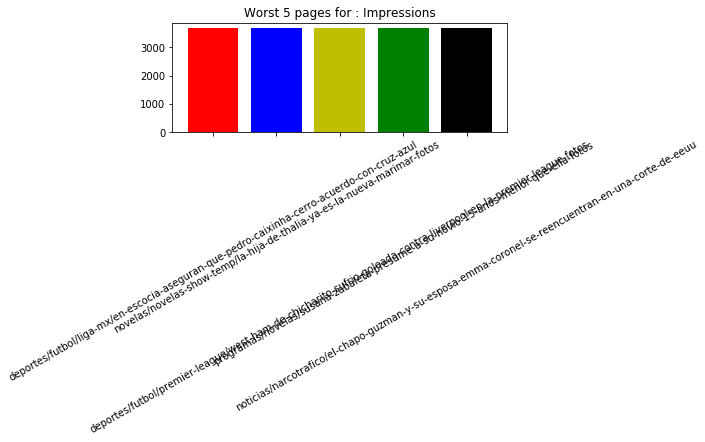

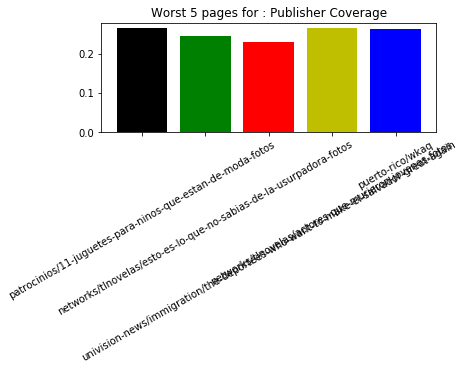

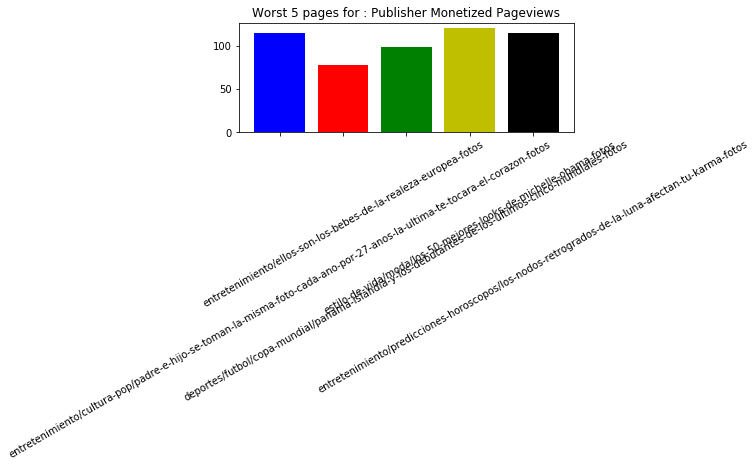

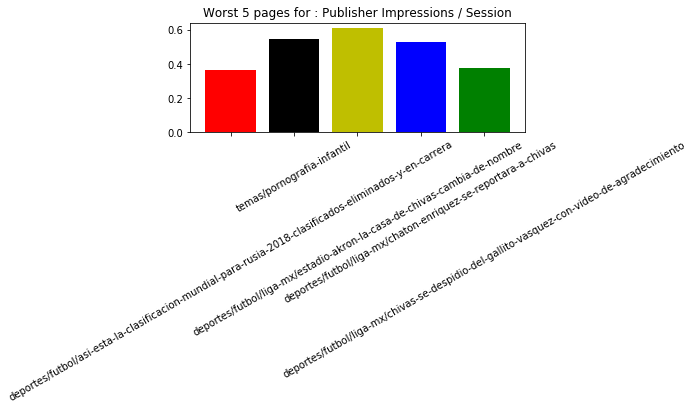

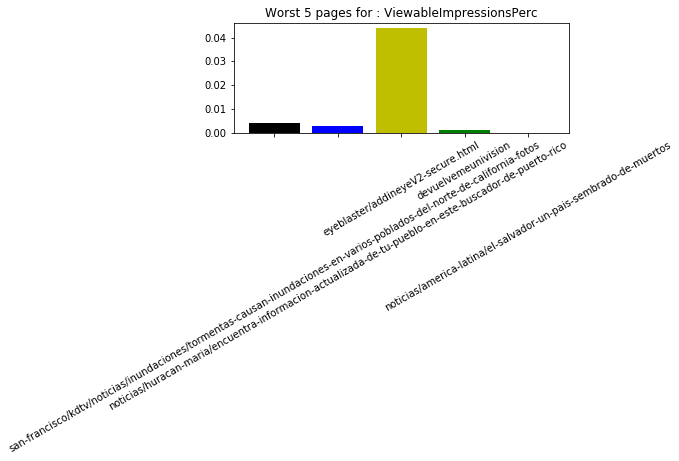

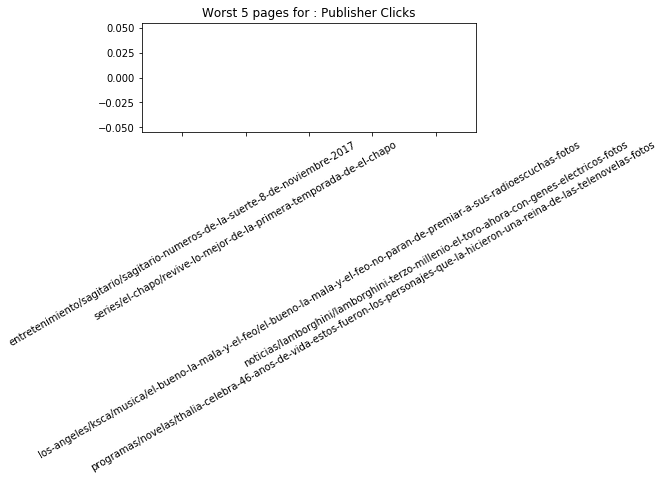

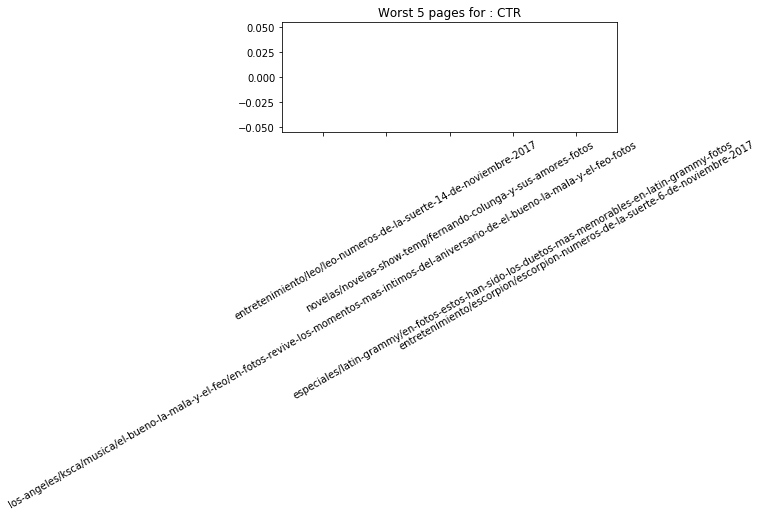

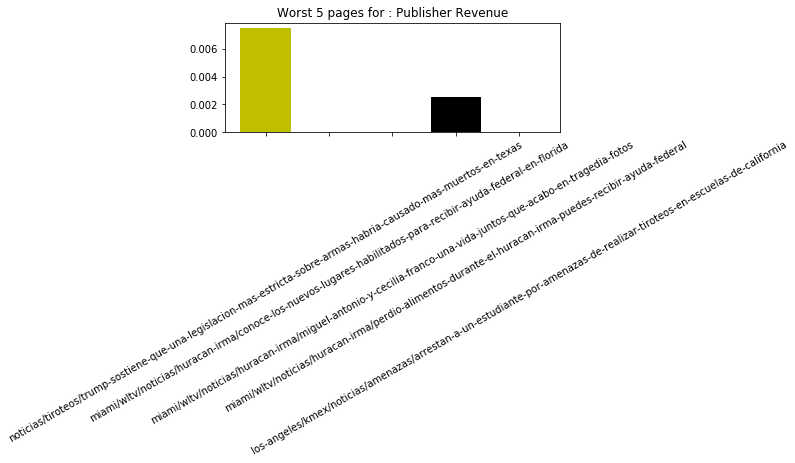

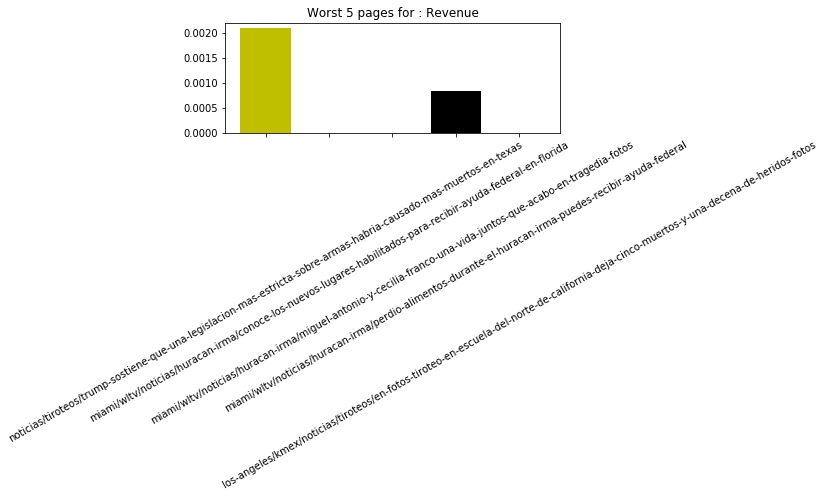

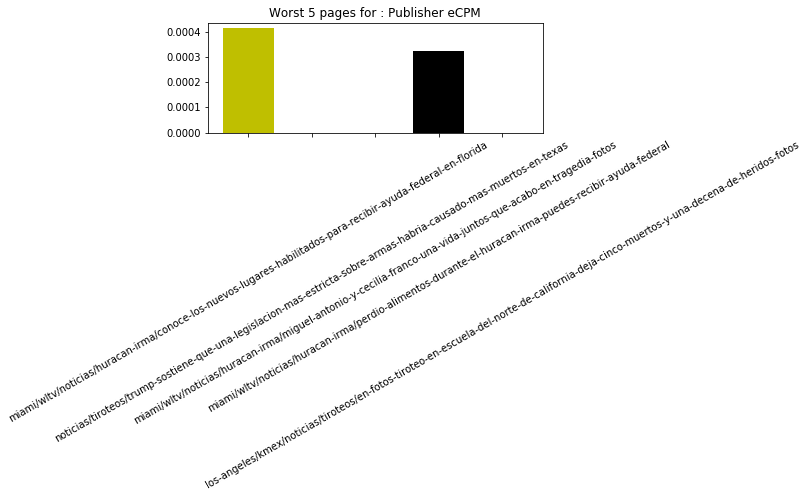

In [8]:
#.... Plot for worst 5 pages .....

for j in range( len( varnames ) - 1 ):
    worst_5_pages_df = master.sort_values( varnames[ j + 1 ], ascending = True ).head()   #.... sorting and taking worst 5 pages
    plt.bar( worst_5_pages_df.Page, worst_5_pages_df.iloc[ :, j+1], color = my_colors )
    plt.xticks([])
    plt.title( 'Worst 5 pages for : ' + varnames[ j + 1 ] )
    plt.xticks( range( 5 ), worst_5_pages_df.Page.tolist(), rotation = 30 )
    plt.subplots_adjust(bottom=0.5) 
    plt.show()

#.... 

In [9]:
#.... 

horoscope_list = [ "acuario", "piscis", "aries", "tauro", "geminis", "cancer", "leo", "virgo", "libra", "escorpion", "sagitario", "capricornio", "predicciones horoscopo", "predicciones ano nuevo", "horoscopo chino", "horoscopos-cancer", "horoscopo-diario", "predicciones-horoscopos", "horoscopo-chino" ]


In [10]:
#..... Initializing variables ......
                                 
topic_blank_indicator = [] ; topic_list = [] ; subtopic_list = [] ; c_list = [] ; d_list = [] ; e_list = [] ; f_list = [] ; g_list = []

for k in range( len( master ) ):
    page_input_list = master.Page[k].split('/')   #.... Splitting into "topic", "subtopic", "c", "d", "e", "f", "g"
    current_topic = page_input_list[0]
    topic_blank_indicator.append( current_topic != '' )   #..... if topic is blank storing False else True ... will be used for filtering rows
    current_topic_sp_char_removed = re.sub( '[^A-Za-z0-9]+', '', current_topic )   #.... Remove special character from topic, for example, if sara+marcos, we get sara marcos
    current_topic_extra_ws_removed = ' '.join(current_topic_sp_char_removed.split())   #.... Removing any extra white space, for example, if sara  marcos, we get sara marcos
    current_topic_further_formatted = re.sub( '(\\w\\w)\\W+\\w\\W+(\\w\\w)', '\\1 \\2', current_topic_extra_ws_removed )   #... Again but for cases where we have, for examemple ana c. alanis, we get ana alanis 
    current_topic_final = 'deportes' if current_topic_further_formatted == 'es' else current_topic_further_formatted  #.... More cleanning 
    current_subtopic = page_input_list[1] if len(page_input_list) >= 2 else 'null'
    current_subtopic_final = 'horoscopo' if current_subtopic in horoscope_list else current_subtopic
    topic_list.append( current_topic_final if len(page_input_list) >= 1 else 'null' )   #.... appending topic with current topic value
    subtopic_list.append( current_subtopic_final if len(page_input_list) >= 2 else 'null' )   #.... appending topic with current subtopic value
    c_list.append( page_input_list[2] if len(page_input_list) >= 3 else 'null' )   #.... appending c with current c value
    d_list.append( page_input_list[3] if len(page_input_list) >= 4 else 'null' )   #.... appending d with current d value
    e_list.append( page_input_list[4] if len(page_input_list) >= 5 else 'null' )   #.... appending e with current e value
    f_list.append( page_input_list[5] if len(page_input_list) >= 6 else 'null' )   #.... appending f with current f value
    g_list.append( page_input_list[6] if len(page_input_list) >= 7 else 'null' )   #.... appending g with current g value


In [11]:
master['topic'] = topic_list ; master['subtopic'] = subtopic_list ; master['c'] = c_list ; master['d'] = d_list ; master['e'] = e_list ; master['f'] = f_list ; master['g'] = g_list

mastertopic_0 = master[ topic_blank_indicator ]

mastertopic = mastertopic_0.sort_values( 'topic', ascending = True ).reset_index()   #.... Ordening topics by A-Z order

temp = [ mastertopic.topic[0] ]

for t in range( len( mastertopic ) - 1 ):
    indicator = mastertopic.topic[t] in mastertopic.topic[t+1]    #.... checking if change is needed
    if indicator:
        temp.append( mastertopic.topic[t] )
    else:
        temp.append( mastertopic.topic[t+1] )

mastertopic['topic'] = temp



In [12]:
#.... We see create a vector of cities

cities = [ "atlanta","arizona","austin","chicago","dallas","fresno","houston","las vegas", "los angeles","miami","north carolina","nueva york", "puerto rico", "sacramento", "san antonio","san diego","san francisco", "san francsico","philadelphia" ]

#.... We duplicate variable topics, for city

mastertopic['city'] = mastertopic.topic

#..... Putting c and d for topic and subtopics based on conditions

mastertopic[ 'topic' ] = [ mastertopic.c[i] if mastertopic.city[i] in cities else mastertopic.topic[i] for i in range( len( mastertopic ) ) ]

mastertopic[ 'subtopic' ] = [ mastertopic.d[i] if mastertopic.city[i] in cities else mastertopic.subtopic[i] for i in range( len( mastertopic ) ) ]


In [13]:
#.... Cleaning ....

#... We filter where colum topic is empty, because there is not article link

mastertopic = mastertopic[ mastertopic.topic != '' ]

#... Remove special character, for example, if sara+marcos, we get sara marcos

mastertopic[ 'topic' ] = [ re.sub( '[^a-zA-Z\\s]', ' ', mastertopic.topic[i] ) for i in range( len( mastertopic ) ) ]

#... Removing any extra white space, for example, if sara  marcos, we get sara marcos

mastertopic[ 'topic' ] = [ ' '.join( mastertopic.topic[i].split() ) for i in range( len( mastertopic ) ) ]

#... Again but for cases where we have, for examemple ana c. alanis, we get ana alanis

mastertopic[ 'topic' ] = [ re.sub( '(\\w\\w)\\W+\\w\\W+(\\w\\w)', '\\1 \\2', mastertopic.topic[i] ) for i in range( len( mastertopic ) ) ]

#... Ordening topics by A-Z order

mastertopic = mastertopic.sort_values( 'topic', ascending = True ).reset_index()


In [14]:
#... Looking for similarity
#... If in row 1 we have sara marcos and row 2 we have sara marcos p. They are similar
#... If they are similar, row 2 sara marcos p is now sara marcos

temp = [ mastertopic.topic[0] ]

for t in range( len( mastertopic ) - 1 ):
    indicator = mastertopic.topic[t] in mastertopic.topic[t+1]    #.... checking if change is needed
    if indicator:
        temp.append( mastertopic.topic[t] )
    else:
        temp.append( mastertopic.topic[t+1] )

mastertopic['topic'] = temp


In [15]:
#.... Topic Freq ...

topicmaster = mastertopic.topic.value_counts().to_frame().reset_index()
topicmaster.rename( columns={'index': 'topic', 'topic': 'Freq'}, inplace=True )    #.... renaming columns
topicmaster = topicmaster.sort_values( 'Freq', ascending = False ).reset_index()
topicmaster['Percentage'] = 100*topicmaster.Freq/topicmaster.Freq.sum()   #.... adding Percentage column

#... We clean again
#... We filter where colum subtopic is empty, because there is not article link

mastertopic = mastertopic[ mastertopic.subtopic != '' ]

#... Remove special character, for example, if sara+marcos, we get sara marcos

mastertopic[ 'subtopic' ] = [ re.sub( '[^a-zA-Z\\s]', ' ', mastertopic.subtopic[i] ) for i in range( len( mastertopic ) ) ]

#... Removing any extra white space, for example, if sara  marcos, we get sara marcos

mastertopic[ 'subtopic' ] = [ ' '.join( mastertopic.subtopic[i].split() ) for i in range( len( mastertopic ) ) ]

#... Again but for cases where we have, for examemple ana c. alanis, we get ana alanis

mastertopic[ 'subtopic' ] = [ re.sub( '(\\w\\w)\\W+\\w\\W+(\\w\\w)', '\\1 \\2', mastertopic.subtopic[i] ) for i in range( len( mastertopic ) ) ]

#... Ordening topics by A-Z order

mastertopic = mastertopic.sort_values( 'subtopic', ascending = True ).reset_index()



ValueError: cannot insert level_0, already exists

In [16]:
#... Looking for similarity
#... If in row 1 we have sara marcos and row 2 we have sara marcos p. They are similar
#... If they are similar, row 2 sara marcos p is now sara marcos

temp = [ mastertopic.subtopic[0] ]

for t in range( len( mastertopic ) - 1 ):
    indicator = mastertopic.subtopic[t] in mastertopic.subtopic[t+1]    #.... checking if change is needed
    if indicator:
        temp.append( mastertopic.subtopic[t] )
    else:
        temp.append( mastertopic.subtopic[t+1] )

mastertopic['subtopic'] = temp



In [17]:
#.... Subtopic Freq ...

subtopicmaster = mastertopic.subtopic.value_counts().to_frame().reset_index()
subtopicmaster.rename( columns={'index': 'subtopic', 'subtopic': 'Freq'}, inplace=True )
subtopicmaster['Percentage'] = 100*subtopicmaster.Freq/subtopicmaster.Freq.sum()   #.... adding Percentage column

#.... We get the mean for each variable per topic per post

columns_0 = [ 'topic', 'Impressions', 'Publisher Coverage', 'Publisher Monetized Pageviews', 'Publisher Impressions / Session', 'ViewableImpressionsPerc', 'Publisher Clicks', 'CTR', 'Publisher Revenue', 'Revenue', 'Publisher eCPM', ]

topicsdf_0 = pd.DataFrame( mastertopic, columns = columns_0 )

topicsdf = topicsdf_0.groupby('topic').mean().reset_index()


In [18]:
#.... We do correlation matrix between the variables

matrixcortopics = topicsdf[ topicsdf.columns.difference( ['topic'] ) ].corr()    #.... correlation matrix

matrixcortopics

varnamestopics = topicsdf.columns.values   #.... We get the names of our variables


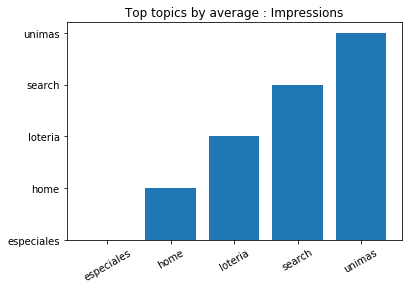

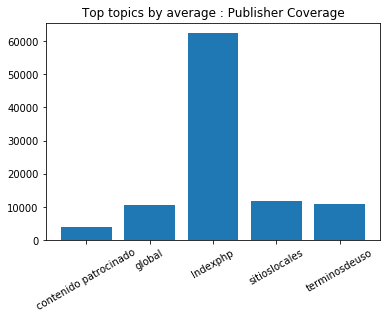

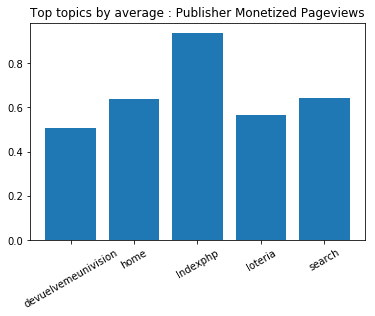

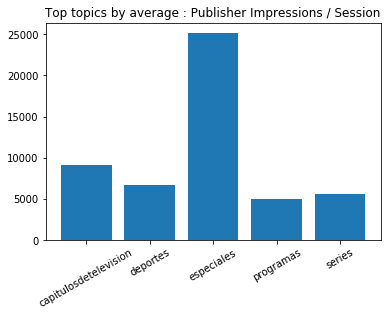

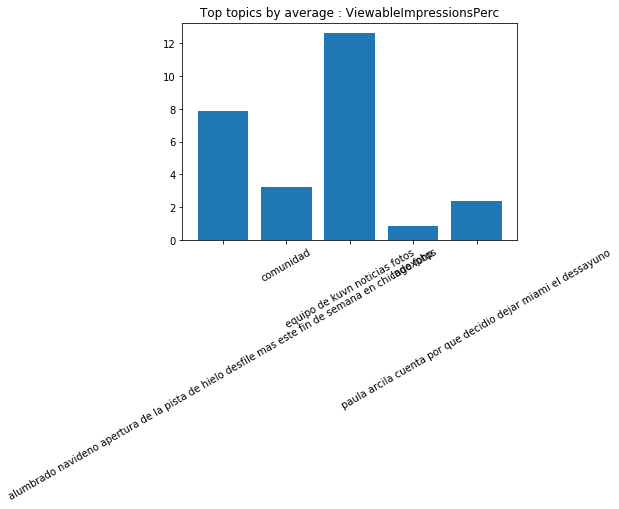

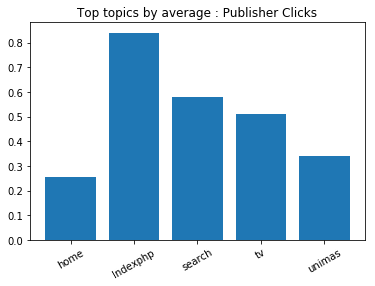

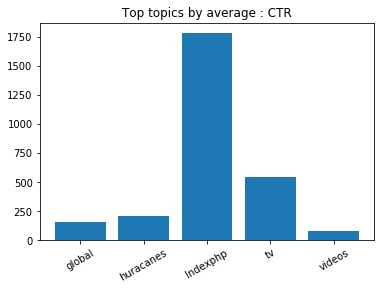

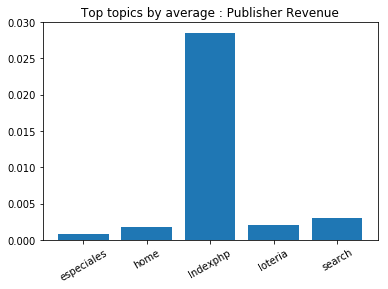

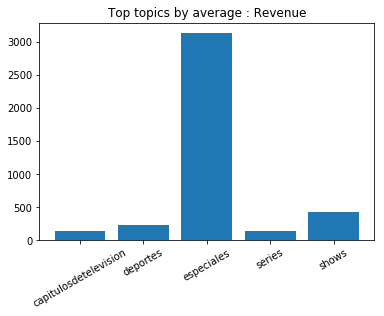

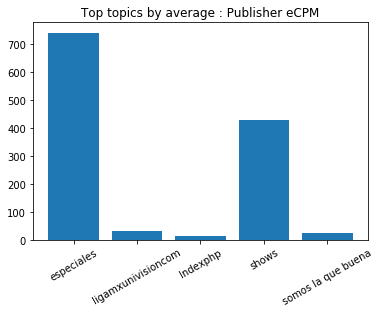

In [19]:
#.... We will do a for loop to get the top five topics pages for every variable .....

for j in range( len( varnamestopics ) - 1 ):
    top_5_topic_df = topicsdf.sort_values( varnamestopics[ j + 1 ], ascending = False ).head()
    plt.bar( top_5_topic_df.topic, top_5_topic_df.iloc[:, j ] )
    plt.title( 'Top topics by average : ' + varnamestopics[ j + 1 ] )
    plt.xticks( rotation = 30 )
    plt.show()


In [20]:
#... For topics, in %

#... We will do a for loop to get the cumulative topics  for every variable

for i in range( len( topicsdf.columns ) - 1 ):
  auxmaster = topicsdf.sort_values( varnamestopics[ i+1 ], ascending = False )   #.... We order the type for bigger to smaller.Top fives
  current_column = auxmaster.iloc[ :, i+1 ]
  current_column_percent = 100*( current_column/current_column.sum() )  #... We get the percentage
  current_column_cumsum = current_column_percent.cumsum()
  auxmastert = topicsdf.sort_values( varnamestopics[ i+1 ], ascending = False ).iloc[ :, 0 ]  #... We get the first five topics, only names
  auxmaster = pd.concat( [auxmastert, current_column_cumsum], axis = 1, keys = ['topic', 'aux'] )   #.... We join and convert in data frame
  

In [21]:
####################
#Regression
#We remove that column we dont have interest
columns = ['c','d','e','f','g','city']
mastertopic.drop(columns, inplace=True, axis=1)
pprint.pprint(mastertopic)

#To do the regression, we will use the variables with higher correlation acording to cormatrix
#Except profit, because we get profit using revenue

X = mastertopic[['Publisher Impressions / Session','Publisher Clicks']]
y = mastertopic[['Publisher Revenue']]

model = sm.OLS(y, X).fit()
print(model.summary())


      level_0  index                                               Page  \
0          46   3713  chicago/wgbo/actividades-del-dia-de-los-muerto...   
1          57   4813  chicago/wgbo/altar-de-muertos-una-tradicion-mu...   
2          77   2725  chicago/wgbo/alumbrado-navideno-apertura-de-la...   
3          47   3038  chicago/wgbo/alumbrado-navideno-apertura-de-la...   
4        2517   1415  houston/kxln/asi-es-el-recorrido-por-el-festiv...   
5          40   1810                    capitulos-de-television/novelas   
6          85   3237                                          comunidad   
7          51   3927  chicago/wgbo/conciertos-desfiles-y-muchos-even...   
8          83   4463  chicago/wgbo/conciertos-festivales-ideas-week-...   
9          53   4825  chicago/wgbo/conciertos-superheroes-y-hasta-ca...   
10       2733   4650                miami/wamr/contactanos-en-amor-1075   
11         87   4860      dallas/kuvn/contenido-patrocinado/la-ley-care   
12        372   3989  dep

In [22]:
#Another regression
mastertopics = (mastertopic.loc[mastertopic['topic'].isin(['especiales', 'entretenimiento', 'programas', 'musica', 'series', 'shows'])])

model = sm.ols(formula= 'Revenue~Impressions+topic', data=mastertopics)
fitted = model.fit()      #.... fitting model
print(fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     28.47
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           3.81e-33
Time:                        21:10:14   Log-Likelihood:                -21291.
No. Observations:                2632   AIC:                         4.260e+04
Df Residuals:                    2625   BIC:                         4.264e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              60.0084    

In [23]:
#Metrics
#Impressions
Impressions = mastertopic.groupby(by = ['topic'])['Impressions'].mean().reset_index()
Impressions_subtopic = mastertopic.groupby(by = ['topic','subtopic'])['Impressions'].mean().reset_index()

ImpressionsforEntretenimiento = (Impressions.loc[Impressions['topic'].isin(['entretenimiento'])])
ImpressionsforNoticias = (Impressions.loc[Impressions['topic'].isin(['noticias'])])
ImpressionsforDeportes = (Impressions.loc[Impressions['topic'].isin(['deportes'])])
ImpressionsforEspeciales = (Impressions.loc[Impressions['topic'].isin(['especiales'])])

Impressions = pd.concat([ImpressionsforEntretenimiento,ImpressionsforNoticias,ImpressionsforDeportes,ImpressionsforEspeciales])

Impressions.Impressions = round( Impressions.Impressions, 2 )

Impressions['Percentage'] = round( 100*Impressions.Impressions/Impressions.Impressions.sum(), 2 )


In [24]:
#Viewable ViewableImpressionsPerc %
ViewableImpressionsPerc = mastertopic.groupby(by = ['topic'])['ViewableImpressionsPerc'].mean().reset_index()
pprint.pprint(ViewableImpressionsPerc)
ViewableImpressionsPerc_subtopic = mastertopic.groupby(by = ['topic','subtopic'])['ViewableImpressionsPerc'].mean().reset_index()
pprint.pprint(ViewableImpressionsPerc_subtopic)

ViewableImpressionsPercforEntretenimiento = (ViewableImpressionsPerc.loc[ViewableImpressionsPerc['topic'].isin(['entretenimiento'])])
ViewableImpressionsPercforNoticias = (ViewableImpressionsPerc.loc[ViewableImpressionsPerc['topic'].isin(['noticias'])])
ViewableImpressionsPercforDeportes = (ViewableImpressionsPerc.loc[ViewableImpressionsPerc['topic'].isin(['deportes'])])
ViewableImpressionsPercforEspeciales = (ViewableImpressionsPerc.loc[ViewableImpressionsPerc['topic'].isin(['especiales'])])

ViewableImpressionsPerc = pd.concat([ViewableImpressionsPercforEntretenimiento,ViewableImpressionsPercforNoticias,ViewableImpressionsPercforDeportes,ViewableImpressionsPercforEspeciales])


                                                topic  ViewableImpressionsPerc
0   actividades del dia de los muertos conciertos ...                 0.540006
1   altar de muertos una tradicion muy viva en la ...                 0.539896
2   alumbrado navideno apertura de la pista de hie...                 0.683943
3   alumbrado navideno apertura de la pista de hie...                 0.761234
4   asi es el recorrido por el festival de luces n...                 0.499106
5                               capitulosdetelevision                 0.312537
6                                           comunidad                 0.770648
7   conciertos desfiles muchos eventos de accion d...                 0.662696
8   conciertos festivales ideas week mucho hallowe...                 0.521358
9   conciertos superheroes hasta carrera de los mu...                 0.574910
10                                contactanos en amor                 0.505079
11                              contenido patrocinad

In [25]:
#Viewable CTR %
CTR = mastertopic.groupby(by = ['topic'])['CTR'].mean().reset_index()
CTR_subtopic = mastertopic.groupby(by = ['topic','subtopic'])['CTR'].mean().reset_index()

CTRforEntretenimiento = (CTR.loc[CTR['topic'].isin(['entretenimiento'])])
CTRforNoticias = (CTR.loc[CTR['topic'].isin(['noticias'])])
CTRforDeportes = (CTR.loc[CTR['topic'].isin(['deportes'])])
CTRforEspeciales = (CTR.loc[CTR['topic'].isin(['especiales'])])

CTR = pd.concat([CTRforEntretenimiento,CTRforNoticias,CTRforDeportes,CTRforEspeciales])


In [26]:
#Viewable Revenue
Revenue = mastertopic.groupby(by = ['topic'])['Revenue'].mean().reset_index()
Revenue_subtopic = mastertopic.groupby(by = ['topic','subtopic'])['Revenue'].mean().reset_index()

RevenueforEntretenimiento = (Revenue.loc[Revenue['topic'].isin(['entretenimiento'])])
RevenueforNoticias = (Revenue.loc[Revenue['topic'].isin(['noticias'])])
RevenueforDeportes = (Revenue.loc[Revenue['topic'].isin(['deportes'])])
RevenueforEspeciales = (Revenue.loc[Revenue['topic'].isin(['especiales'])])

Revenue = pd.concat([RevenueforEntretenimiento,RevenueforNoticias,RevenueforDeportes,RevenueforEspeciales])

Revenue.Revenue = round( Revenue.Revenue, 2 )

Revenue['Percentage'] = round( 100*Revenue.Revenue/Revenue.Revenue.sum(), 2 )

pprint.pprint(Revenue)  

              topic  Revenue  Percentage
16  entretenimiento    57.44        4.89
41         noticias    45.11        3.84
12         deportes   331.98       28.29
18       especiales   739.07       62.97
